## DIABETES DATASET FEATURE ENGINEERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from ydata_profiling import ProfileReport

import warnings
warnings.simplefilter(action = "ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
pd.set_option("display.max_rows", 20)
pd.set_option("display.float_format", lambda x : '%.3f' % x)

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI   
0            6      148             72             35        0 33.600  \
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe().T

count    mean     std    min    25%     50%   
Pregnancies              768.000   3.845   3.370  0.000  1.000   3.000  \
Glucose                  768.000 120.895  31.973  0.000 99.000 117.000   
BloodPressure            768.000  69.105  19.356  0.000 62.000  72.000   
SkinThickness            768.000  20.536  15.952  0.000  0.000  23.000   
Insulin                  768.000  79.799 115.244  0.000  0.000  30.500   
BMI                      768.000  31.993   7.884  0.000 27.300  32.000   
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.244   0.372   
Age                      768.000  33.241  11.760 21.000 24.000  29.000   
Outcome                  768.000   0.349   0.477  0.000  0.000   0.000   

                             75%     max  
Pregnancies                6.000  17.000  
Glucose                  140.250 199.000  
BloodPressure             80.000 122.000  
SkinThickness             32.000  99.000  
Insulin                  127.250 846.000  
BMI                       36.600  67.100  
DiabetesPedigreeFunction   0.626   2.420  
Age                       41.000  81.000  
Outcome                    1.000   1.000

In [9]:
profile = ProfileReport(df, title = "Diabetes Profiling Report",
                        html = {"style": {"full_width": True}})

In [11]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- 9 Features 
- 768 Rows

- There are no duplicate rows.
- Pregnancies: It has a right-skewed distribution. There are too many observations with 0 values in the variable. It may also be normal to have an observation with a value of 0 in this variable that defines the number of pregnancies.
- Glucose: The variable distribution is very close to the normal distribution except for observations with a value of 0, and a person with a Glucose value of 0 does not make sense. These observations may be direct errors or outliers. When we subtract 1.5 IQR from the Q1 value, we get a value greater than 0. This structure is not a outlier. There may be a missing value.
- Similar structures exist in BloodPressure, SkinThickness, Insulin and BMI variables. The conclusion drawn here is that observations with a value of 0 are missing observations. These variables also contain contradictory observations.
- Pregnancies variable has a 60% positive correlation with the Age variable.
- Glucose variable has a 50% positive correlation with the target variable.
- The SkinThickess variable has a positive correlation of nearly 50% with the Insulin and BloodPressure variables.

- Seperating features according to their types..

In [12]:
df["Outcome"] = df["Outcome"].astype("object")

In [13]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [14]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [15]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [16]:
cat_cols

['Outcome']

In [17]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [18]:
for col in cat_cols:
    print(pd.DataFrame({col: df[col].value_counts(),
                      "Ratio": 100 * df[col].value_counts() / len(df)})),
    end = "\n\n\n"

         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896


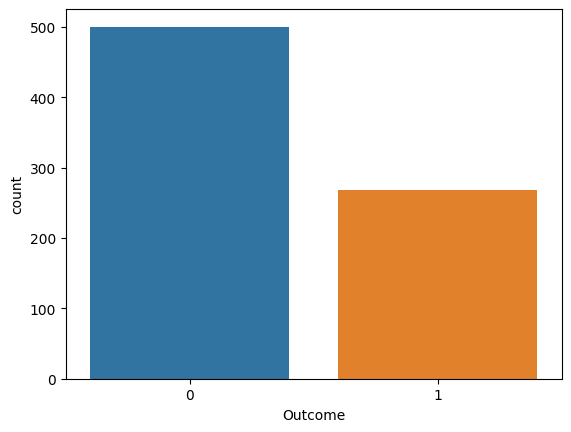

In [19]:
sns.countplot(x = df["Outcome"], data = df)

plt.show()

## Analysis of Numerical Features

In [20]:
for col in num_cols:
    print(pd.DataFrame({col: df.groupby("Outcome")[col].mean()}),
         end = "\n\n\n")

         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067




- Patients who have had more pregnancies are more likely to have diabetes.
- Patients with high Glucose and Insulin levels are more likely to have diabetes.
- Increasing values for BMI, Skin Thickness, Blood Pressure variables increased the likelihood of diabetes.
- Regarding the age variable, the risk of diabetes increases after the age of 32.

## Correlation

In [21]:
df.corr()

Pregnancies  Glucose  BloodPressure  SkinThickness   
Pregnancies                     1.000    0.129          0.141         -0.082  \
Glucose                         0.129    1.000          0.153          0.057   
BloodPressure                   0.141    0.153          1.000          0.207   
SkinThickness                  -0.082    0.057          0.207          1.000   
Insulin                        -0.074    0.331          0.089          0.437   
BMI                             0.018    0.221          0.282          0.393   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184   
Age                             0.544    0.264          0.240         -0.114   
Outcome                         0.222    0.467          0.065          0.075   

                          Insulin   BMI  DiabetesPedigreeFunction    Age   
Pregnancies                -0.074 0.018                    -0.034  0.544  \
Glucose                     0.331 0.221                     0.137  0.264   
BloodPressure               0.089 0.282                     0.041  0.240   
SkinThickness               0.437 0.393                     0.184 -0.114   
Insulin                     1.000 0.198                     0.185 -0.042   
BMI                         0.198 1.000                     0.141  0.036   
DiabetesPedigreeFunction    0.185 0.141                     1.000  0.034   
Age                        -0.042 0.036                     0.034  1.000   
Outcome                     0.131 0.293                     0.174  0.238   

                          Outcome  
Pregnancies                 0.222  
Glucose                     0.467  
BloodPressure               0.065  
SkinThickness               0.075  
Insulin                     0.131  
BMI                         0.293  
DiabetesPedigreeFunction    0.174  
Age                         0.238  
Outcome                     1.000

## Correlation Matrix

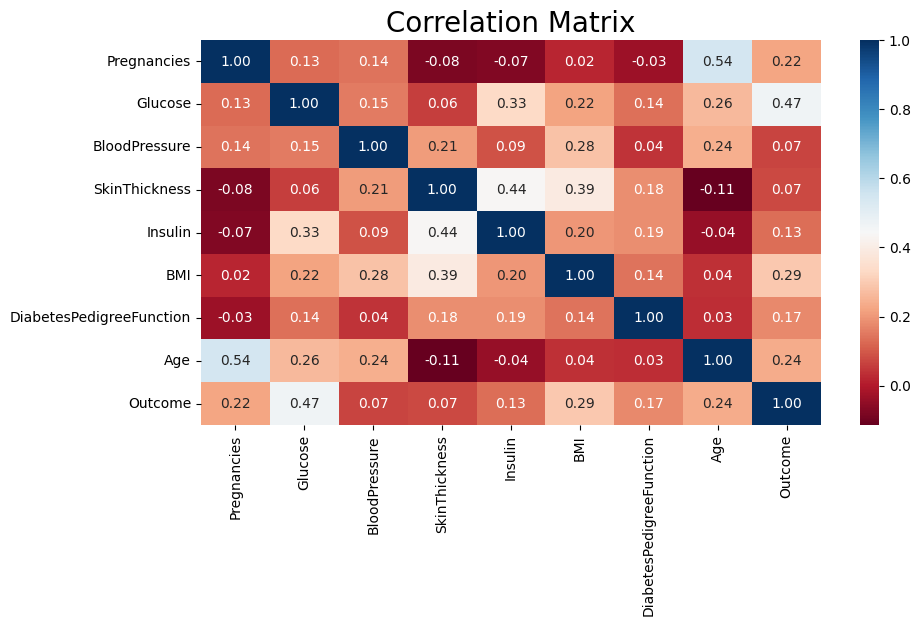

In [22]:
f, ax = plt.subplots(figsize = [10, 5])
sns.heatmap(df.corr(), annot = True, fmt = ".2f", ax = ax, cmap = "RdBu")
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()

## Creating Base Model Before Feature Engineering

In [23]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

In [24]:
y = y.astype("int64")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [26]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [27]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
Auc: 0.75


- **Accuracy: 0.77 # (TP+TN)/(TP+TN+FP+FN)**
- **Recall: 0.706 #  TP/(TP+FN)**
- **Precision: 0.59 #  TP/(TP+FP)**
- **F1: 0.64  # 2 * ( Precision*Recall ) / ( Precision+Recall )**
- **Auc: 0.75**

## Feature Importance

In [28]:
feature_imp = pd.DataFrame({'Value': rf_model.feature_importances_, 'Feature': X.columns})

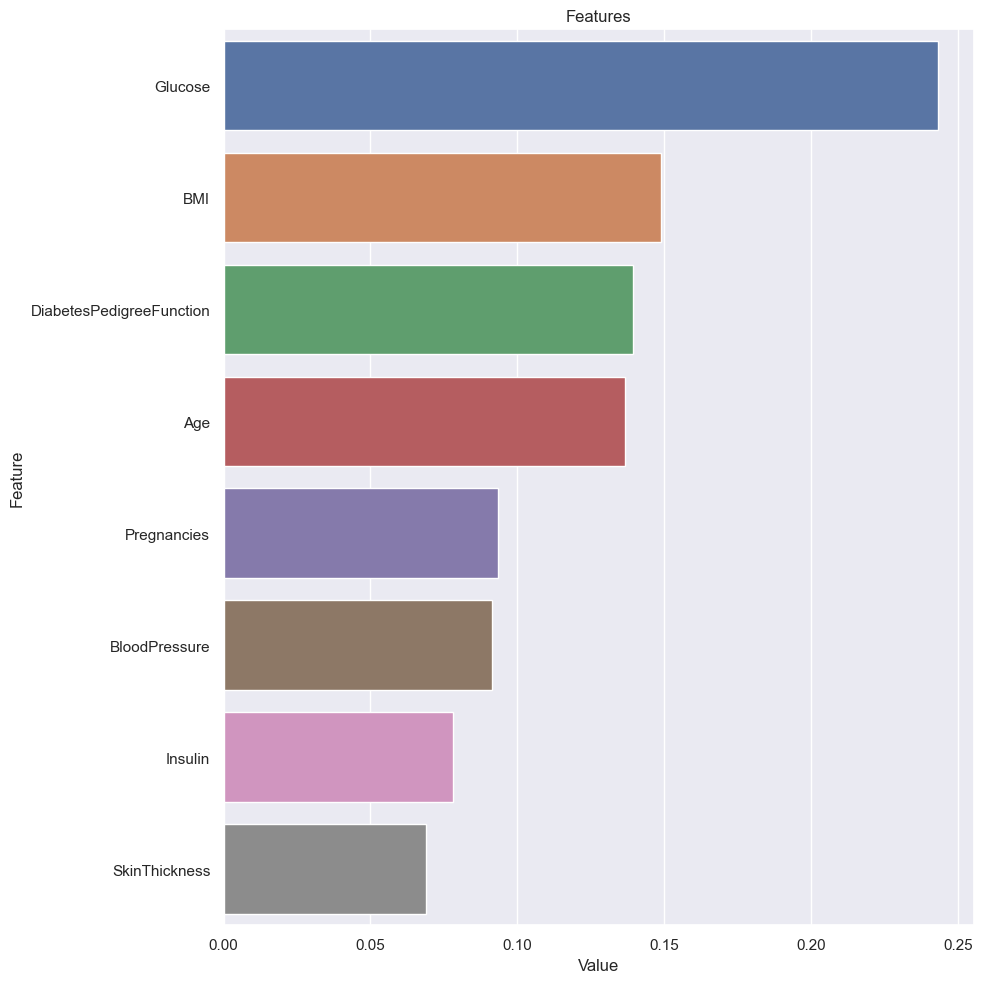

In [29]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=1)
    
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:len(X)])
plt.title('Features')
plt.tight_layout()

plt.show()

## Feature Engineering

### Missing Values

In [30]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [31]:
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]

In [32]:
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

### Each variable containing 0 in the observation units and replaced the observation values containing 0 with NaN.


In [33]:
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [34]:
df.isnull().sum().sort_values(ascending = False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [35]:
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [36]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking Outliers

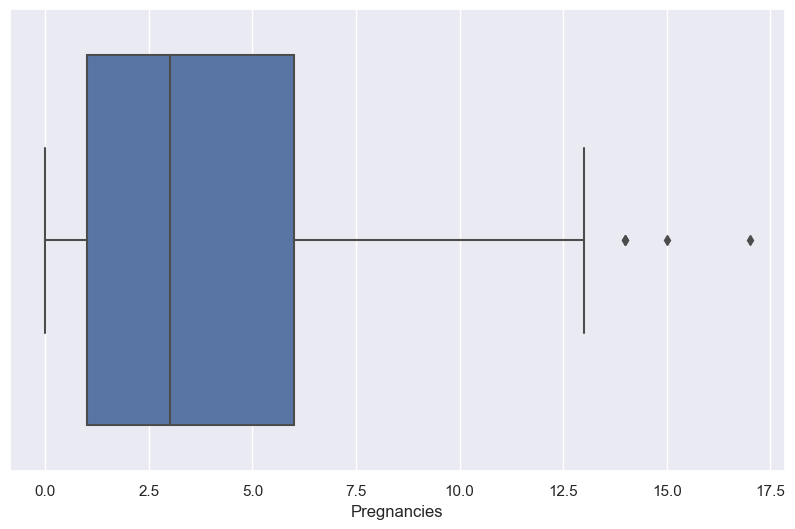

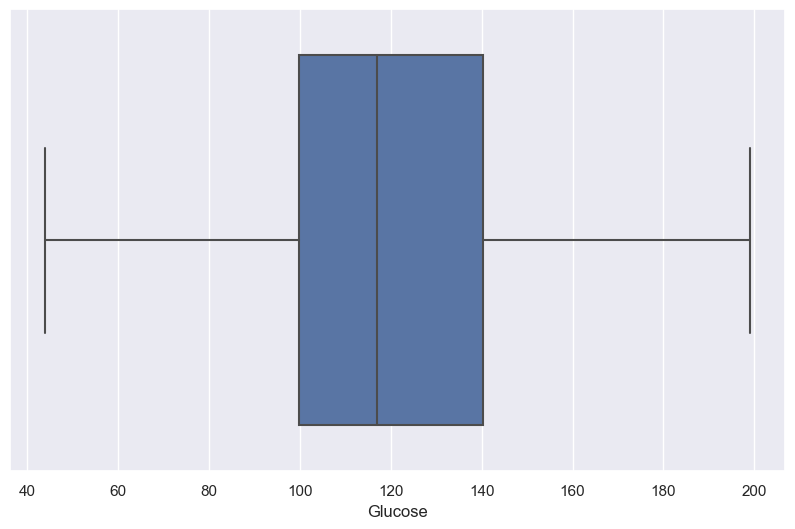

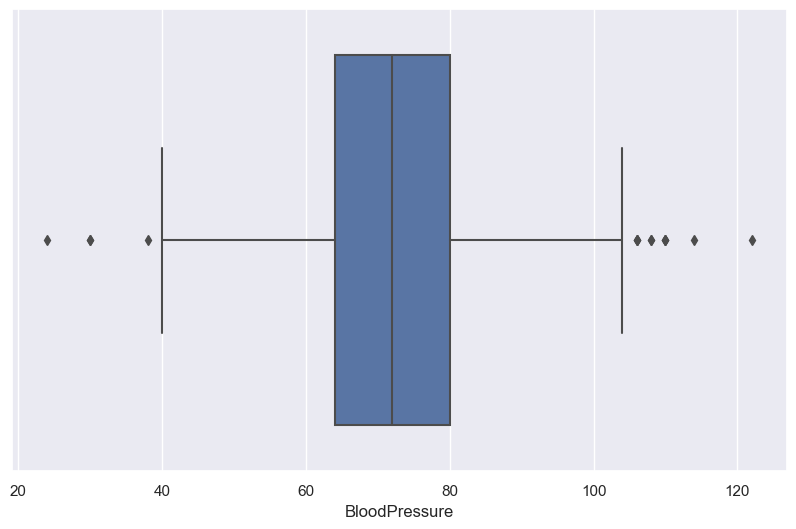

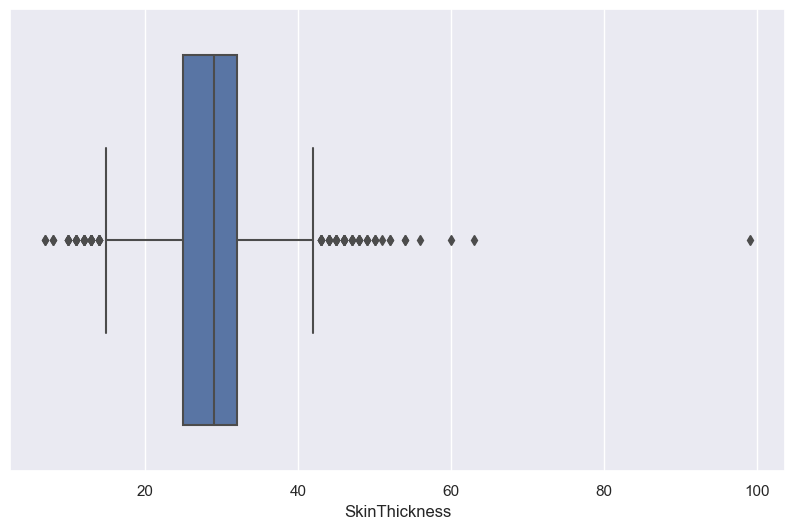

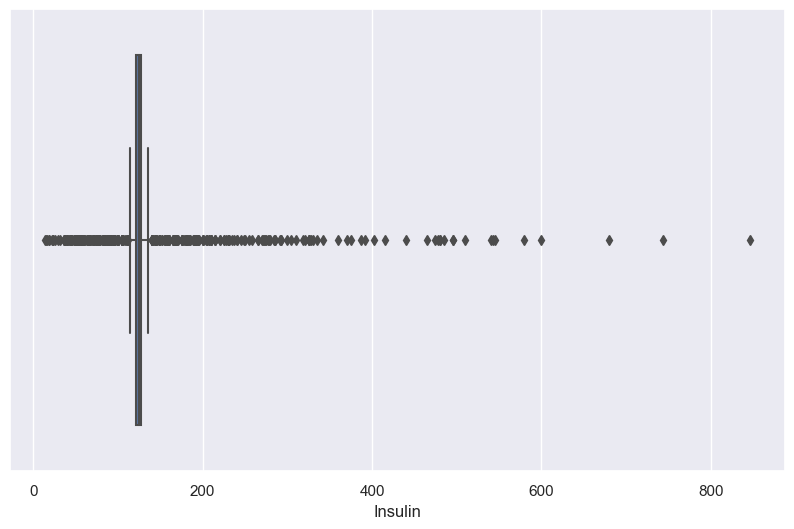

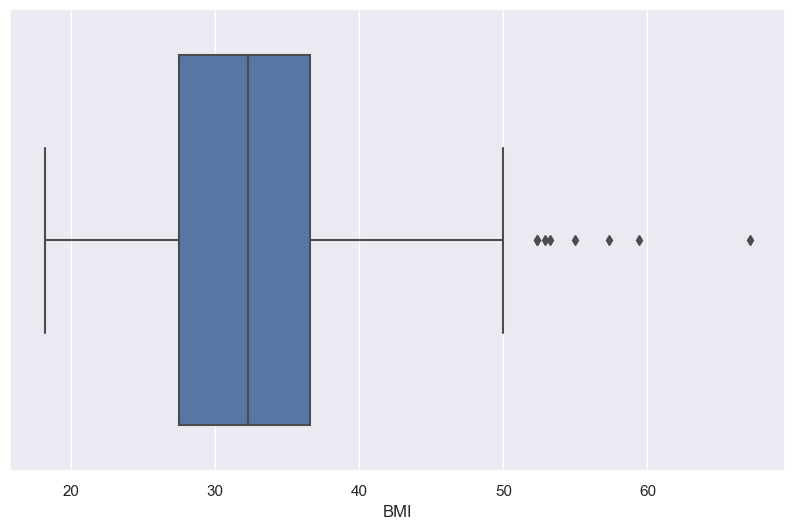

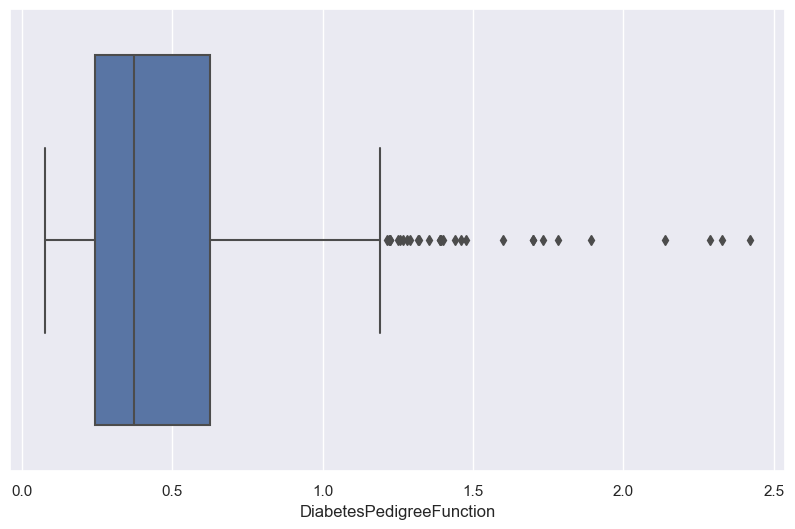

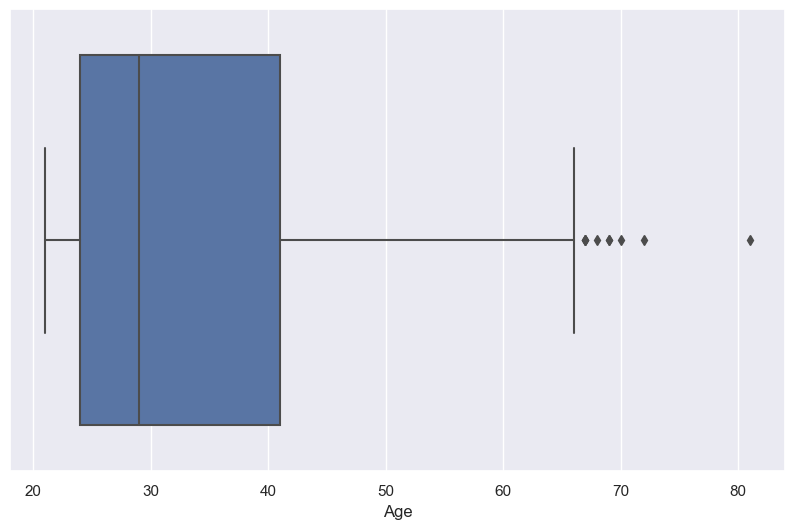

In [37]:
for col in num_cols:
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = df[col])
    plt.show()

In [38]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [39]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [40]:
for col in num_cols:
    outlier_thresholds(df, col)

In [41]:
for col in num_cols:
    replace_with_thresholds(df, col)

## Feature Extraction

### # Separating the age variable into categories and creating a new age variable.

In [42]:
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

### # Defining BMI below 18.5 is underweight, between 18.5 and 24.9 is normal, between 24.9 and 29.9 is overweight, and above 30 is obese.

In [43]:
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])

### # Converting glucose value to categorical variable.

In [44]:
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

### # Creating a categorical variable by considering age and body mass index together. 3 breakdowns created.

In [45]:
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

### # Creating categorical variable with Age x Glucose

In [46]:
df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

### # Creating categorical variable with Insulin

In [47]:
def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [48]:
df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)

df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]

### # Glucose x Pregnancies

In [49]:
df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * (1+ df["Pregnancies"])

In [50]:
df.columns = [col.upper() for col in df.columns]

In [51]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI   
0            6  148.000         72.000         35.000  125.000 33.600  \
1            1   85.000         66.000         29.000  125.000 26.600   
2            8  183.000         64.000         29.000  125.000 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DIABETESPEDIGREEFUNCTION    AGE OUTCOME NEW_AGE_CAT     NEW_BMI   
0                     0.627 50.000       1      senior       Obese  \
1                     0.351 31.000       0      mature  Overweight   
2                     0.672 32.000       1      mature     Healthy   
3                     0.167 21.000       0      mature  Overweight   
4                     2.288 33.000       1      mature       Obese   

   NEW_GLUCOSE NEW_AGE_BMI_NOM NEW_AGE_GLUCOSE_NOM NEW_INSULIN_SCORE   
0  Prediabetes     obesesenior          highsenior            Normal  \
1       Normal     obesemature        normalmature            Normal   
2  Prediabetes     obesemature          highmature            Normal   
3       Normal     obesemature        normalmature            Normal   
4       Normal     obesemature          highmature          Abnormal   

   NEW_GLUCOSE*INSULIN  NEW_GLUCOSE*PREGNANCIES  
0            18500.000                 1036.000  
1            10625.000                  170.000  
2            22875.000                 1647.000  
3             8366.000                  178.000  
4            23016.000                  137.000

In [52]:
df.dtypes

PREGNANCIES                    int64
GLUCOSE                      float64
BLOODPRESSURE                float64
SKINTHICKNESS                float64
INSULIN                      float64
BMI                          float64
DIABETESPEDIGREEFUNCTION     float64
AGE                          float64
OUTCOME                       object
NEW_AGE_CAT                   object
NEW_BMI                     category
NEW_GLUCOSE                 category
NEW_AGE_BMI_NOM               object
NEW_AGE_GLUCOSE_NOM           object
NEW_INSULIN_SCORE             object
NEW_GLUCOSE*INSULIN          float64
NEW_GLUCOSE*PREGNANCIES      float64
dtype: object

## Encoding

### # Separating  features according to types.

In [53]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

In [54]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and \
              df[col].dtypes != "O"]

In [55]:
cat_cols = cat_cols + num_but_cat

In [56]:
cat_cols

['OUTCOME',
 'NEW_AGE_CAT',
 'NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [57]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]

In [58]:
num_cols = [col for col in num_cols if col not in num_but_cat]

In [59]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE*INSULIN',
 'NEW_GLUCOSE*PREGNANCIES']

### # LABEL ENCODING

In [60]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [61]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [62]:
binary_cols

['OUTCOME', 'NEW_AGE_CAT', 'NEW_INSULIN_SCORE']

In [63]:
for col in binary_cols:
    df = label_encoder(df, col)

In [64]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI   
0            6  148.000         72.000         35.000  125.000 33.600  \
1            1   85.000         66.000         29.000  125.000 26.600   
2            8  183.000         64.000         29.000  125.000 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DIABETESPEDIGREEFUNCTION    AGE  OUTCOME  NEW_AGE_CAT     NEW_BMI   
0                     0.627 50.000        1            1       Obese  \
1                     0.351 31.000        0            0  Overweight   
2                     0.672 32.000        1            0     Healthy   
3                     0.167 21.000        0            0  Overweight   
4                     2.288 33.000        1            0       Obese   

   NEW_GLUCOSE NEW_AGE_BMI_NOM NEW_AGE_GLUCOSE_NOM  NEW_INSULIN_SCORE   
0  Prediabetes     obesesenior          highsenior                  1  \
1       Normal     obesemature        normalmature                  1   
2  Prediabetes     obesemature          highmature                  1   
3       Normal     obesemature        normalmature                  1   
4       Normal     obesemature          highmature                  0   

   NEW_GLUCOSE*INSULIN  NEW_GLUCOSE*PREGNANCIES  
0            18500.000                 1036.000  
1            10625.000                  170.000  
2            22875.000                 1647.000  
3             8366.000                  178.000  
4            23016.000                  137.000

In [65]:
df.dtypes

PREGNANCIES                    int64
GLUCOSE                      float64
BLOODPRESSURE                float64
SKINTHICKNESS                float64
INSULIN                      float64
BMI                          float64
DIABETESPEDIGREEFUNCTION     float64
AGE                          float64
OUTCOME                        int32
NEW_AGE_CAT                    int32
NEW_BMI                     category
NEW_GLUCOSE                 category
NEW_AGE_BMI_NOM               object
NEW_AGE_GLUCOSE_NOM           object
NEW_INSULIN_SCORE              int32
NEW_GLUCOSE*INSULIN          float64
NEW_GLUCOSE*PREGNANCIES      float64
dtype: object

In [66]:
df["NEW_BMI"] = df["NEW_BMI"].astype("object")

In [67]:
df["NEW_GLUCOSE"] = df["NEW_GLUCOSE"].astype("object")

In [68]:
df.dtypes

PREGNANCIES                   int64
GLUCOSE                     float64
BLOODPRESSURE               float64
SKINTHICKNESS               float64
INSULIN                     float64
BMI                         float64
DIABETESPEDIGREEFUNCTION    float64
AGE                         float64
OUTCOME                       int32
NEW_AGE_CAT                   int32
NEW_BMI                      object
NEW_GLUCOSE                  object
NEW_AGE_BMI_NOM              object
NEW_AGE_GLUCOSE_NOM          object
NEW_INSULIN_SCORE             int32
NEW_GLUCOSE*INSULIN         float64
NEW_GLUCOSE*PREGNANCIES     float64
dtype: object

In [69]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI   
0            6  148.000         72.000         35.000  125.000 33.600  \
1            1   85.000         66.000         29.000  125.000 26.600   
2            8  183.000         64.000         29.000  125.000 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DIABETESPEDIGREEFUNCTION    AGE  OUTCOME  NEW_AGE_CAT     NEW_BMI   
0                     0.627 50.000        1            1       Obese  \
1                     0.351 31.000        0            0  Overweight   
2                     0.672 32.000        1            0     Healthy   
3                     0.167 21.000        0            0  Overweight   
4                     2.288 33.000        1            0       Obese   

   NEW_GLUCOSE NEW_AGE_BMI_NOM NEW_AGE_GLUCOSE_NOM  NEW_INSULIN_SCORE   
0  Prediabetes     obesesenior          highsenior                  1  \
1       Normal     obesemature        normalmature                  1   
2  Prediabetes     obesemature          highmature                  1   
3       Normal     obesemature        normalmature                  1   
4       Normal     obesemature          highmature                  0   

   NEW_GLUCOSE*INSULIN  NEW_GLUCOSE*PREGNANCIES  
0            18500.000                 1036.000  
1            10625.000                  170.000  
2            22875.000                 1647.000  
3             8366.000                  178.000  
4            23016.000                  137.000

### One-Hot Encoding

In [70]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]
cat_cols

['NEW_AGE_BMI_NOM', 'NEW_AGE_GLUCOSE_NOM', 'NEW_BMI', 'NEW_GLUCOSE']

In [71]:
df = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [72]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI   
0            6  148.000         72.000         35.000  125.000 33.600  \
1            1   85.000         66.000         29.000  125.000 26.600   
2            8  183.000         64.000         29.000  125.000 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DIABETESPEDIGREEFUNCTION    AGE  OUTCOME  NEW_AGE_CAT  NEW_INSULIN_SCORE   
0                     0.627 50.000        1            1                  1  \
1                     0.351 31.000        0            0                  1   
2                     0.672 32.000        1            0                  1   
3                     0.167 21.000        0            0                  1   
4                     2.288 33.000        1            0                  0   

   NEW_GLUCOSE*INSULIN  NEW_GLUCOSE*PREGNANCIES  NEW_AGE_BMI_NOM_obesesenior   
0            18500.000                 1036.000                         True  \
1            10625.000                  170.000                        False   
2            22875.000                 1647.000                        False   
3             8366.000                  178.000                        False   
4            23016.000                  137.000                        False   

   NEW_AGE_BMI_NOM_underweightmature  NEW_AGE_GLUCOSE_NOM_hiddensenior   
0                              False                             False  \
1                              False                             False   
2                              False                             False   
3                              False                             False   
4                              False                             False   

   NEW_AGE_GLUCOSE_NOM_highmature  NEW_AGE_GLUCOSE_NOM_highsenior   
0                           False                            True  \
1                           False                           False   
2                            True                           False   
3                           False                           False   
4                            True                           False   

   NEW_AGE_GLUCOSE_NOM_lowmature  NEW_AGE_GLUCOSE_NOM_lowsenior   
0                          False                          False  \
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   NEW_AGE_GLUCOSE_NOM_normalmature  NEW_AGE_GLUCOSE_NOM_normalsenior   
0                             False                             False  \
1                              True                             False   
2                             False                             False   
3                              True                             False   
4                             False                             False   

   NEW_BMI_Obese  NEW_BMI_Overweight  NEW_BMI_Underweight   
0           True               False                False  \
1          False                True                False   
2          False               False                False   
3          False                True                False   
4           True               False                False   

   NEW_GLUCOSE_Prediabetes  
0                     True  
1                    False  
2                     True  
3                    False  
4                    False

## Scaling

In [73]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE*INSULIN',
 'NEW_GLUCOSE*PREGNANCIES']

In [74]:
scaler = StandardScaler()

In [75]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [76]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI   
0        0.640    0.866         -0.032          0.680   -0.183  0.167  \
1       -0.845   -1.205         -0.528         -0.011   -0.183 -0.852   
2        1.234    2.017         -0.694         -0.011   -0.183 -1.333   
3       -0.845   -1.074         -0.528         -0.702   -0.553 -0.634   
4       -1.142    0.504         -2.679          0.680    0.331  1.549   

   DIABETESPEDIGREEFUNCTION    AGE  OUTCOME  NEW_AGE_CAT  NEW_INSULIN_SCORE   
0                     0.468  1.426        1            1                  1  \
1                    -0.365 -0.191        0            0                  1   
2                     0.604 -0.106        1            0                  1   
3                    -0.921 -1.042        0            0                  1   
4                     5.485 -0.020        1            0                  0   

   NEW_GLUCOSE*INSULIN  NEW_GLUCOSE*PREGNANCIES  NEW_AGE_BMI_NOM_obesesenior   
0                0.024                    0.914                         True  \
1               -0.503                   -0.913                        False   
2                0.317                    2.203                        False   
3               -0.654                   -0.896                        False   
4                0.326                   -0.982                        False   

   NEW_AGE_BMI_NOM_underweightmature  NEW_AGE_GLUCOSE_NOM_hiddensenior   
0                              False                             False  \
1                              False                             False   
2                              False                             False   
3                              False                             False   
4                              False                             False   

   NEW_AGE_GLUCOSE_NOM_highmature  NEW_AGE_GLUCOSE_NOM_highsenior   
0                           False                            True  \
1                           False                           False   
2                            True                           False   
3                           False                           False   
4                            True                           False   

   NEW_AGE_GLUCOSE_NOM_lowmature  NEW_AGE_GLUCOSE_NOM_lowsenior   
0                          False                          False  \
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   NEW_AGE_GLUCOSE_NOM_normalmature  NEW_AGE_GLUCOSE_NOM_normalsenior   
0                             False                             False  \
1                              True                             False   
2                             False                             False   
3                              True                             False   
4                             False                             False   

   NEW_BMI_Obese  NEW_BMI_Overweight  NEW_BMI_Underweight   
0           True               False                False  \
1          False                True                False   
2          False               False                False   
3          False                True                False   
4           True               False                False   

   NEW_GLUCOSE_Prediabetes  
0                     True  
1                    False  
2                     True  
3                    False  
4                    False

In [77]:
df.shape

(768, 26)

## # Modeling

In [78]:
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [80]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

In [81]:
y_pred = rf_model.predict(X_test)

In [82]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.8
Recall: 0.733
Precision: 0.68
F1: 0.71
Auc: 0.78


## # FEATURE IMPORTANCE

In [83]:
feature_imp = pd.DataFrame({'Value': rf_model.feature_importances_, 'Feature': X.columns})

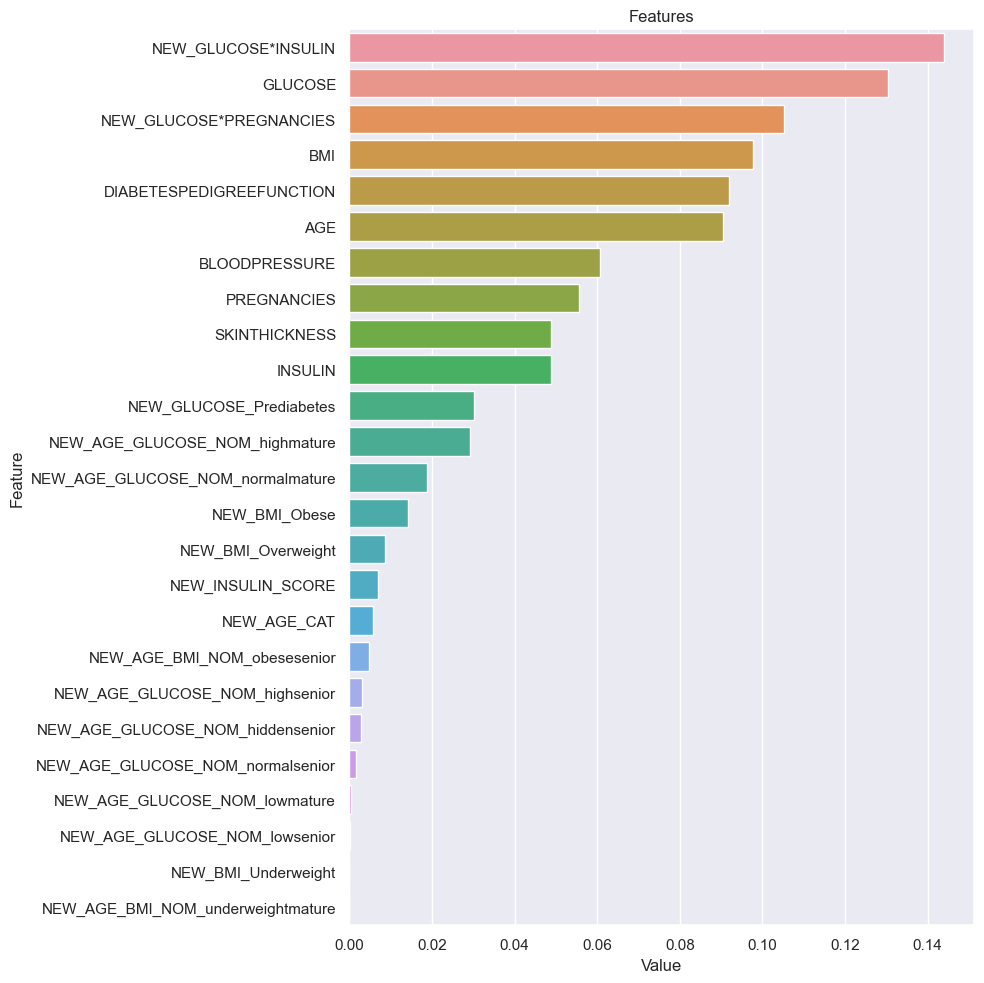

In [84]:
plt.figure(figsize=(10, 10))

sns.set(font_scale=1)
    
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:len(X)])
plt.title('Features')
plt.tight_layout()
    
plt.show()

In [87]:
feature_imp.sort_values(by="Value", ascending = True)

Value                            Feature
13  0.000  NEW_AGE_BMI_NOM_underweightmature
23  0.000                NEW_BMI_Underweight
18  0.000      NEW_AGE_GLUCOSE_NOM_lowsenior
17  0.000      NEW_AGE_GLUCOSE_NOM_lowmature
20  0.002   NEW_AGE_GLUCOSE_NOM_normalsenior
..    ...                                ...
6   0.092           DIABETESPEDIGREEFUNCTION
5   0.098                                BMI
11  0.105            NEW_GLUCOSE*PREGNANCIES
1   0.131                            GLUCOSE
10  0.144                NEW_GLUCOSE*INSULIN

[25 rows x 2 columns]

- Examined outliers with a box plot, but the box plot calculates outliers based on 25% - 75% quarters. - Outliers were suppressed by 5% - 95% in order not to affect the distribution in the data set too much.
- There was no missing observation structure in the data set, but it was seen from the distributions and structure that the values were related to missing observations.
- 0 values were changed to nan and suppressed with the median to avoid affecting the distribution.
- 8 new variants were produced, these are:
    - Categorical Age: 21-50 --> mature 50+ --> senior
    - Categorical BMI: 18,5 < underweight, 18.5 - 24.9 --> normal, 24.9 - 29.9 --> Overweight and 30+ Obese
    - Categorical Glucose: Normal, Prediabetes, Diabetes
    - Categorical Age x BMI: underweightmature, underweightsenior, healthymature, healthysenior, overweightmature, overweightsenior, obesemature, obesesenior
    - Categorical Age x Glucose: lowmature, lowsenior, normalmature, normalsenior, hiddenmature, hiddensenior, highmature, highsenior
    - Categorical Insulin: Normal, Abnormal
    - Glucose x Insulin
    - Glucose x Pregnancies
    
- Glucose x Insulin and Glucose x Pregnancies variables have become high-performance variables.
- Some classes did not affect performance in the Age x Glucose variable.
- One class did not affect performance in the Age x BMI variable.